In [1]:
import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import numpy as np
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotInteractableException

import warnings
warnings.filterwarnings ("ignore")

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
driver=webdriver.Chrome()

# Question No: 1
1. Write a python program which searches all the product under a particular product from www.amazon.in. The 
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for 
guitars.    

In [30]:
driver.get('https://www.amazon.in/')

In [31]:
Search_tag=driver.find_element(By.XPATH,'//*[@id="twotabsearchtextbox"]')
search_input=str(input('User can type here   '))
Search_tag.send_keys(search_input)
time.sleep(5)
search=driver.find_element(By.XPATH,'//*[@id="nav-search-submit-button"]')
search.click()

User can type here   guiter


# Question No: 2
    
2. In the above question, now scrape the following details of each product listed in first 3 pages of your search 
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then 
scrape all the products available under that product name. Details to be scraped are: "Brand 
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and 
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 


In [33]:
product_urls = []

start = 0
end = 1
try:
    for page in range(start,end):
        for i in driver.find_elements(By.XPATH,'//div[@class="a-section a-spacing-none a-spacing-top-small s-title-instructions-style"]/h2/a'):
            product_urls.append(i.get_attribute('href'))
        next_button = driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[65]/div/div/span/a[3]')
        next_button.click()
        time.sleep(2)
except:
    print('Error')

In [34]:
len(product_urls)

60

In [35]:
brand_name = []
name_of_product = []
price = []
exchange = []
delivery = []
availablity = []

In [36]:
for url in product_urls:
    driver.get(url)
    time.sleep(5)

    try:
        brand = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[4]/div[1]/div/h1/span')
        brand_name.append(brand.text.split(" ")[0])
    except NoSuchElementException:
        brand_name.append('-')
    try:
        prices = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[1]/div[4]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[1]/div/div/span[1]/span[2]/span[2]')
        price.append(prices.text)
    except NoSuchElementException:
        price.append('-')
    try:
        product = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[4]/div[1]/div/h1/span')
        name_of_product.append(product.text.split(' ')[1])
    except NoSuchElementException:
        name_of_product.append('-')
    try:
        ship = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[1]/div[4]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[3]/div[10]/div[1]/div/div/div/span/span[1]')
        delivery.append(ship.text)
    except NoSuchElementException:
        delivery.append('-')  

In [37]:
len(brand_name),len(price),len(delivery),len(name_of_product)

(60, 60, 60, 60)

In [38]:
brand_name

['Kadence',
 'Kadence',
 'Musical',
 'Musical',
 '-',
 '-',
 'Intern',
 '-',
 'Intern',
 'Medellin',
 'Intern',
 'Intern',
 '-',
 'Intern',
 'Intern',
 'Yamaha',
 '-',
 'Kadence',
 'Revel',
 'Medellin',
 'Musical',
 'Musical',
 'Henrix',
 'Musical',
 'Kadence',
 '-',
 'Intern',
 '-',
 'Intern',
 '-',
 'Henrix',
 'Kadence',
 'Kadence',
 'Medellin',
 '-',
 'Intern',
 'BLUEBERRY',
 'Kadence',
 '-',
 '-',
 'BLUEBERRY',
 '-',
 'Revel',
 '-',
 '-',
 'Kadence',
 'Yamaha',
 '-',
 '-',
 'Vault',
 'Vault',
 '-',
 '-',
 'Intern',
 'Intern',
 '-',
 'Enya',
 'Musical',
 'Musical',
 'Musical']

In [39]:
price

['4,899',
 '4,899',
 '4,079',
 '4,993',
 '-',
 '-',
 '2,179',
 '-',
 '2,198',
 '1,973',
 '2,199',
 '2,198',
 '-',
 '2,199',
 '2,198',
 '7,398',
 '-',
 '4,499',
 '2,099',
 '2,199',
 '4,082',
 '5,093',
 '3,099',
 '5,073',
 '4,899',
 '-',
 '2,199',
 '-',
 '2,198',
 '-',
 '3,599',
 '5,999',
 '8,999',
 '2,599',
 '-',
 '2,199',
 '2,295',
 '-',
 '-',
 '-',
 '2,663',
 '-',
 '2,039',
 '-',
 '-',
 '6,299',
 '7,750',
 '-',
 '-',
 '5,799',
 '4,899',
 '-',
 '-',
 '2,640',
 '2,199',
 '-',
 '17,000',
 '4,327',
 '5,782',
 '4,093']

In [40]:
delivery

['Friday, 28 June',
 'Sunday, 30 June',
 'Friday, 28 June',
 'Friday, 28 June',
 '-',
 '-',
 'Saturday, 29 June',
 '-',
 'Saturday, 29 June',
 'Friday, 28 June',
 'Saturday, 29 June',
 'Saturday, 29 June',
 '-',
 'Saturday, 29 June',
 'Monday, 1 July',
 'Sunday, 30 June',
 '-',
 'Friday, 28 June',
 'Monday, 1 July',
 'Friday, 28 June',
 'Friday, 28 June',
 'Friday, 28 June',
 'Friday, 28 June',
 'Friday, 28 June',
 'Sunday, 30 June',
 '-',
 'Monday, 1 July',
 '-',
 'Monday, 1 July',
 '-',
 'Friday, 28 June',
 'Friday, 28 June',
 'Friday, 28 June',
 'Friday, 28 June',
 '-',
 'Monday, 1 July',
 'Sunday, 30 June',
 '-',
 '-',
 '-',
 'Sunday, 30 June',
 '-',
 'Monday, 1 July',
 '-',
 '-',
 'Friday, 28 June',
 'Friday, 28 June',
 '-',
 '-',
 'Friday, 28 June',
 'Friday, 28 June',
 '-',
 '-',
 'Wednesday, 3 July',
 'Monday, 1 July',
 '-',
 'Tuesday, 2 July',
 'Friday, 28 June',
 'Friday, 28 June',
 'Friday, 28 June']

In [41]:
name_of_product

['Frontier',
 'rosewood',
 'Works',
 'Works',
 '-',
 '-',
 'INT-38C',
 '-',
 'INT-38C-SB',
 '38”',
 'INT-38C',
 '38C',
 '-',
 'INT-38C-NT-G',
 'INT-38C',
 'F280',
 '-',
 'Frontier',
 '38',
 '38"',
 'Works',
 'Works',
 '38C',
 'Works',
 'rosewood',
 '-',
 'Int-38c',
 '-',
 'INT-38C',
 '-',
 '38C',
 'A281',
 'Slowhand',
 'Acoustic',
 '-',
 'INT-38C-BK-G',
 '38C,',
 'Frontier',
 '-',
 '-',
 'B-D38,',
 '-',
 '38',
 '-',
 '-',
 'Frontier',
 '22.8',
 '-',
 '-',
 'EA20CE',
 'DA20',
 '-',
 '-',
 'INT-38C',
 'INT-38C-RD-G',
 '-',
 'Nova',
 'Works',
 'Works',
 'Works']

In [42]:
df = pd.DataFrame({
    'Brand':brand_name,
    'Product':name_of_product,
    'Price':price,
    'Expected-Delivery':delivery})

df

,Brand,Product,Price,Expected-Delivery
0,Kadence,Frontier,"4,899","Friday, 28 June"
1,Kadence,rosewood,"4,899","Sunday, 30 June"
2,Musical,Works,"4,079","Friday, 28 June"
3,Musical,Works,"4,993","Friday, 28 June"
4,-,-,-,-
5,-,-,-,-
6,Intern,INT-38C,"2,179","Saturday, 29 June"
7,-,-,-,-
8,Intern,INT-38C-SB,"2,198","Saturday, 29 June"
9,Medellin,38”,"1,973","Friday, 28 June"


In [43]:
df.to_csv('guiter.csv')

# Question: 4

4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand 
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, 
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
details is missing then replace it by “- “. Save your results in a dataframe and CSV. 

In [93]:
driver.get('https://www.flipkart.com/')

In [94]:
try:
    search_tag = driver.find_element(By.XPATH,'//input[@class="Pke_EE"]')
    search_tag.send_keys('smartphones')
    search_tag.send_keys(Keys.RETURN)
except ElementNotInteractableException as e:
    print('exception raised', e)

In [95]:
product_urls = []

try:
    for x in driver.find_elements(By.XPATH,'//a[@class="CGtC98"]'):
        product_urls.append(x.get_attribute('href'))
        time.sleep(2)
except:
    print('Error')

In [96]:
len(product_urls)

24

In [97]:
brand_name =[]
phone_name = []
ram_capacity = []
rom_capacity = []
p_camera = []
s_camera = []
price = []
battery = []

In [103]:
for url in product_urls:
    driver.get(url)
    time.sleep(5)
    
    try:
        name = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        brand_name.append(name.text.split(' ')[0])
    except:
        brand_name.append('-')
    try:
        phone = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        phone_name.append(phone.text.split(' ')[1])
    except:
        phone_name.append('-')
    try:
        ram = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[6]/div/div[2]/div[1]/div/ul/li[2]/a')
        ram_capacity.append(ram.text.split(' ')[-2])
    except:
        ram_capacity.append('-')
    try:
        rom = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[1]')
        rom_capacity.append(rom.text.split('|')[-1])
    except:
        rom_capacity.append('-')
    try:
        priced = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[4]/div[1]/div/div[1]')
        price.append(priced.text)
    except:
        price.append('-')
    try:
        cam_1 = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[3]')
        p_camera.append(cam_1.text.split(' ')[0])
    except:
        p_camera.append('-')
    try:
        cam_2 = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[3]')
        s_camera.append(cam_2.text.split('|')[-1])
    except:
        s_camera.append('-')
    try:
        b = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[4]')
        battery.append(b.text)
    except:
        battery.append('-')

In [105]:
brand_name[24:48]

['realme',
 'Motorola',
 'Motorola',
 'POCO',
 'Motorola',
 'POCO',
 'Motorola',
 'Motorola',
 'Motorola',
 'POCO',
 'realme',
 'OnePlus',
 'OnePlus',
 'Motorola',
 'realme',
 'realme',
 'SAMSUNG',
 'POCO',
 'realme',
 'SAMSUNG',
 'SAMSUNG',
 'Motorola',
 'Motorola',
 'vivo']

In [106]:
phone_name[24:48]

['GT',
 'G34',
 'G34',
 'M6',
 'G34',
 'C65',
 'g64',
 'g04s',
 'g64',
 'C65',
 '12x',
 'Nord',
 'Nord',
 'g04s',
 '12x',
 '12x',
 'Galaxy',
 'C65',
 '12x',
 'Galaxy',
 'Galaxy',
 'g64',
 'g64',
 'T3x']

In [107]:
 ram_capacity[24:48]

['512',
 '8',
 '8',
 '256',
 '8',
 '256',
 '256',
 '-',
 '256',
 '256',
 '6',
 '-',
 '-',
 '-',
 '6',
 '6',
 '6',
 '256',
 '6',
 '6',
 '6',
 '256',
 '256',
 '6']

In [108]:
 rom_capacity[24:48]

[' 512 GB ROM',
 ' 128 GB ROM',
 ' 128 GB ROM',
 ' Expandable Upto 1 TB',
 ' 128 GB ROM',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 2 TB',
 '-',
 '-',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 2 TB',
 ' Expandable Upto 2 TB',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 2 TB',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 1 TB',
 ' Expandable Upto 1 TB']

In [109]:
s_camera[24:48]

[' 32MP Front Camera',
 ' 16MP Front Camera',
 ' 16MP Front Camera',
 ' 8MP Front Camera',
 ' 16MP Front Camera',
 ' 8MP Front Camera',
 ' 16MP Front Camera',
 ' 5MP Front Camera',
 ' 16MP Front Camera',
 ' 8MP Front Camera',
 ' 8MP Front Camera',
 '-',
 '-',
 ' 5MP Front Camera',
 ' 8MP Front Camera',
 ' 8MP Front Camera',
 ' 13MP Front Camera',
 ' 8MP Front Camera',
 ' 8MP Front Camera',
 ' 13MP Front Camera',
 ' 13MP Front Camera',
 ' 16MP Front Camera',
 ' 16MP Front Camera',
 ' 8MP Front Camera']

In [110]:
p_camera[24:48]

['50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '-',
 '-',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP',
 '50MP']

In [111]:
price[24:48]

['₹44,999',
 '₹11,999',
 '₹11,999',
 '-',
 '₹11,999',
 '₹6,799',
 '₹13,999',
 '₹6,999',
 '₹13,999',
 '₹6,799',
 '₹14,999',
 '₹16,930',
 '₹18,917',
 '₹6,999',
 '₹12,999',
 '₹12,999',
 '₹12,490',
 '₹6,799',
 '₹14,999',
 '₹12,490',
 '₹12,490',
 '₹13,999',
 '₹15,999',
 '₹14,999']

In [112]:
battery[24:48]

['5500 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '-',
 '-',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '6000 mAh Battery',
 '6000 mAh Battery',
 '6000 mAh Battery',
 '6000 mAh Battery']

In [113]:
phone_df = pd.DataFrame({
    'Brand_Name':brand_name,
    'Model':phone_name,
    'RAM':ram_capacity,
    'ROM':rom_capacity,
    'Primary_Camera':p_camera,
    'Secondary_Camera':s_camera,
    'Price':price,
    'Battery':battery})

phone_df[24:48]

,Brand_Name,Model,RAM,ROM,Primary_Camera,Secondary_Camera,Price,Battery
24,realme,GT,512,512 GB ROM,50MP,32MP Front Camera,"₹44,999",5500 mAh Battery
25,Motorola,G34,8,128 GB ROM,50MP,16MP Front Camera,"₹11,999",5000 mAh Battery
26,Motorola,G34,8,128 GB ROM,50MP,16MP Front Camera,"₹11,999",5000 mAh Battery
27,POCO,M6,256,Expandable Upto 1 TB,50MP,8MP Front Camera,-,5000 mAh Battery
28,Motorola,G34,8,128 GB ROM,50MP,16MP Front Camera,"₹11,999",5000 mAh Battery
29,POCO,C65,256,Expandable Upto 1 TB,50MP,8MP Front Camera,"₹6,799",5000 mAh Battery
30,Motorola,g64,256,Expandable Upto 1 TB,50MP,16MP Front Camera,"₹13,999",6000 mAh Battery
31,Motorola,g04s,-,Expandable Upto 1 TB,50MP,5MP Front Camera,"₹6,999",5000 mAh Battery
32,Motorola,g64,256,Expandable Upto 1 TB,50MP,16MP Front Camera,"₹13,999",6000 mAh Battery
33,POCO,C65,256,Expandable Upto 1 TB,50MP,8MP Front Camera,"₹6,799",5000 mAh Battery


In [37]:
phone_df.to_csv('mobiles.csv')

# Question : 6

6. Write a program to scrap all the available details of best gaming laptops from digit.in.     

In [52]:
driver.get('https://www.digit.in/')

In [53]:
try:
    search_tag = driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div/div/nav/ul/li[3]/a')
    search_tag.click()
except ElementNotInteractableException as e:
    print('exception raised', e)

In [54]:
search = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div/div[2]/div[1]/div[4]/div[2]/p/a')
search.click()

In [55]:
product = []

try:
    for i in driver.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]/a'):
        product.append(i.text)
except NoSuchElementException as e:
    print('exception raised', e)

product

['MSI Prestige 16 AI Evo B1M',
 'Asus ROG Zephyrus G14 GA402XZ-N2019WS',
 'Acer Predator Triton Neo 16',
 'ASUS Zenbook 14 OLED (UX3405)',
 'HP Spectre x360 16-aa0664TX',
 'Lenovo IdeaPad Pro 5 Core Ultra',
 'Acer Nitro V 16 (ANV16-41)',
 'Acer Swift Go 14 SFG14-72T']

In [56]:
os = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="woo_code_zone_loop clearbox"]'):
        os.append(i.text.replace('\n',' ').split(' ')[2:4])
except NoSuchElementException as e:
    print('exception raised', e)
    
os    

[['Windows', '11'],
 ['Windows', '11'],
 ['Windows', '11'],
 ['Windows', '11'],
 ['Windows', '11'],
 ['Windows', '11'],
 ['Windows', '11'],
 ['Windows', '11']]

In [57]:
disp = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="woo_code_zone_loop clearbox"]'):
        disp.append(i.text.replace('\n',' ').split(' ')[8])
except NoSuchElementException as e:
    print('exception raised', e)
    
disp    

['16', '14', '16', '14', '16', '16', '16', '14']

In [58]:
processor = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="woo_code_zone_loop clearbox"]'):
        processor.append(i.text.replace('\n',' ').split(' ')[11:])
except NoSuchElementException as e:
    print('exception raised', e)
    
processor    

[['Intel', 'Core', 'Ultra', '9'],
 ['7th', 'Gen,', 'AMD', 'Ryzen', '9', '7940HS'],
 ['Intel', 'Core', 'Ultra', '9', '185H'],
 ['Intel', 'Core', 'Ultra', '7-155H'],
 ['Intel', 'Core', 'Ultra', '7-155H'],
 ['Intel', 'Core', 'Ultra', '7-155H'],
 ['AMD', 'Ryzen', '7-7840HS'],
 ['Intel', 'Core', 'Ultra', '7-155H']]

In [59]:
laptop_df = pd.DataFrame({
    'Laptop_Name':product,
    'Operating_System':os,
    'Display':disp,
    'Processor':processor})

laptop_df

,Laptop_Name,Operating_System,Display,Processor
0,MSI Prestige 16 AI Evo B1M,"[Windows, 11]",16,"[Intel, Core, Ultra, 9]"
1,Asus ROG Zephyrus G14 GA402XZ-N2019WS,"[Windows, 11]",14,"[7th, Gen,, AMD, Ryzen, 9, 7940HS]"
2,Acer Predator Triton Neo 16,"[Windows, 11]",16,"[Intel, Core, Ultra, 9, 185H]"
3,ASUS Zenbook 14 OLED (UX3405),"[Windows, 11]",14,"[Intel, Core, Ultra, 7-155H]"
4,HP Spectre x360 16-aa0664TX,"[Windows, 11]",16,"[Intel, Core, Ultra, 7-155H]"
5,Lenovo IdeaPad Pro 5 Core Ultra,"[Windows, 11]",16,"[Intel, Core, Ultra, 7-155H]"
6,Acer Nitro V 16 (ANV16-41),"[Windows, 11]",16,"[AMD, Ryzen, 7-7840HS]"
7,Acer Swift Go 14 SFG14-72T,"[Windows, 11]",14,"[Intel, Core, Ultra, 7-155H]"


# Question : 7
    
7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: 
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.     

In [81]:
driver.get('https://www.forbes.com/billionaires/')

In [83]:
billionaires_rank = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="Table_rank__X4MKf"]/div')[:50]:
        billionaires_rank.append(i.text.replace('.',''))
except NoSuchElementException as e:
    print('exception raised',e)
    
billionaires_rank  

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '27',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '35',
 '37',
 '38',
 '39',
 '40',
 '40',
 '42',
 '43',
 '44',
 '45',
 '46',
 '46',
 '48',
 '48',
 '50']

In [84]:
billionaires_name = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="Table_personName__Bus2E"]')[:50]:
        billionaires_name.append(i.text)
except NoSuchElementException as e:
    print('exception raised',e)
    
billionaires_name    

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Mark Zuckerberg',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Steve Ballmer',
 'Mukesh Ambani',
 'Larry Page',
 'Sergey Brin',
 'Michael Bloomberg',
 'Amancio Ortega',
 'Carlos Slim Helu & family',
 'Francoise Bettencourt Meyers & family',
 'Michael Dell',
 'Gautam Adani',
 'Jim Walton & family',
 'Rob Walton & family',
 'Jensen Huang',
 'Alice Walton',
 'David Thomson & family',
 'Julia Koch & family',
 'Zhong Shanshan',
 'Charles Koch & family',
 'Giovanni Ferrero',
 'Prajogo Pangestu',
 'Zhang Yiming',
 'Tadashi Yanai & family',
 'Phil Knight & family',
 'Mark Mateschitz',
 'Klaus-Michael Kuehne',
 'Colin Huang',
 'Stephen Schwarzman',
 'Jacqueline Mars',
 'John Mars',
 'Dieter Schwarz',
 'Li Ka-shing',
 'Shiv Nadar',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Ken Griffin',
 'MacKenzie Scott',
 'Thomas Peterffy',
 'Reinhold Wuerth & family',
 'William Ding',
 'Savitri Jindal & family',
 'Gianluigi Aponte',
 'Raf

In [85]:
net_worth = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="Table_finalWorth__UZA6k"]/span')[:50]:
        net_worth.append(i.text.replace('B','Billon Dollars').replace('$',''))
except NoSuchElementException as e:
    print('exception raised',e)
    
net_worth    

['233 Billon Dollars',
 '195 Billon Dollars',
 '194 Billon Dollars',
 '177 Billon Dollars',
 '141 Billon Dollars',
 '133 Billon Dollars',
 '128 Billon Dollars',
 '121 Billon Dollars',
 '116 Billon Dollars',
 '114 Billon Dollars',
 '110 Billon Dollars',
 '106 Billon Dollars',
 '103 Billon Dollars',
 '102 Billon Dollars',
 '99.5 Billon Dollars',
 '91 Billon Dollars',
 '84 Billon Dollars',
 '78.4 Billon Dollars',
 '77.4 Billon Dollars',
 '77 Billon Dollars',
 '72.3 Billon Dollars',
 '67.8 Billon Dollars',
 '64.3 Billon Dollars',
 '62.3 Billon Dollars',
 '58.5 Billon Dollars',
 '43.8 Billon Dollars',
 '43.4 Billon Dollars',
 '43.4 Billon Dollars',
 '42.8 Billon Dollars',
 '40.9 Billon Dollars',
 '39.6 Billon Dollars',
 '39.2 Billon Dollars',
 '38.9 Billon Dollars',
 '38.8 Billon Dollars',
 '38.5 Billon Dollars',
 '38.5 Billon Dollars',
 '38 Billon Dollars',
 '37.3 Billon Dollars',
 '36.9 Billon Dollars',
 '36.8 Billon Dollars',
 '36.8 Billon Dollars',
 '36.4 Billon Dollars',
 '35.6 Billon 

In [86]:
billioniares_age = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY"]/div[4]')[:50]:
        billioniares_age.append(i.text)
except NoSuchElementException as e:
    print('exception raised',e)
    
billioniares_age   

['52',
 '60',
 '39',
 '79',
 '93',
 '68',
 '68',
 '66',
 '51',
 '50',
 '82',
 '88',
 '84',
 '70',
 '59',
 '61',
 '75',
 '79',
 '61',
 '74',
 '66',
 '61',
 '69',
 '88',
 '59',
 '79',
 '40',
 '75',
 '86',
 '31',
 '86',
 '44',
 '77',
 '84',
 '88',
 '84',
 '95',
 '78',
 '75',
 '73',
 '55',
 '53',
 '79',
 '88',
 '52',
 '74',
 '83',
 '79',
 '47',
 '66']

In [87]:
billioniares_citizenship = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY"]/div[5]')[:50]:
        billioniares_citizenship.append(i.text)
except NoSuchElementException as e:
    print('exception raised',e)
    
billioniares_citizenship

['United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'Spain',
 'Mexico',
 'France',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'Canada',
 'United States',
 'China',
 'United States',
 'Italy',
 'Indonesia',
 'China',
 'Japan',
 'United States',
 'Austria',
 'Germany',
 'China',
 'United States',
 'United States',
 'United States',
 'Germany',
 'Hong Kong',
 'India',
 'France',
 'France',
 'United States',
 'United States',
 'United States',
 'Germany',
 'China',
 'India',
 'Switzerland',
 'Switzerland',
 'Canada',
 'Japan']

In [88]:
billioniares_source = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY"]/div[6]')[:50]:
        billioniares_source.append(i.text)
except NoSuchElementException as e:
    print('exception raised',e)
    
billioniares_source

['Tesla, SpaceX',
 'Amazon',
 'Facebook',
 'Oracle',
 'Berkshire Hathaway',
 'Microsoft',
 'Microsoft',
 'Diversified',
 'Google',
 'Google',
 'Bloomberg LP',
 'Zara',
 'Telecom',
 "L'Oréal",
 'Dell Technologies',
 'Infrastructure, commodities',
 'Walmart',
 'Walmart',
 'Semiconductors',
 'Walmart',
 'Media',
 'Koch Industries',
 'Beverages, pharmaceuticals',
 'Koch Industries',
 'Nutella, chocolates',
 'Petrochemicals, energy',
 'TikTok',
 'Fashion retail',
 'Nike',
 'Red Bull',
 'Shipping',
 'E-commerce',
 'Investments',
 'Candy, pet food',
 'Candy, pet food',
 'Retail',
 'Diversified',
 'software services',
 'Chanel',
 'Chanel',
 'Hedge funds',
 'Amazon',
 'Discount brokerage',
 'Fasteners',
 'Online games',
 'Steel',
 'Shipping',
 'Shipping',
 'Cryptocurrency exchange',
 'Telecom, investments']

In [89]:
industry = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="Table_tableRow__lF_cY"]/div[7]')[:50]:
        industry.append(i.text)
except NoSuchElementException as e:
    print('exception raised',e)
    
industry

['Automotive',
 'Technology',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Diversified',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Fashion & Retail',
 'Telecom',
 'Fashion & Retail',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Media & Entertainment',
 'Diversified',
 'Food & Beverage',
 'Diversified',
 'Food & Beverage',
 'Diversified',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Food & Beverage',
 'Logistics',
 'Technology',
 'Finance & Investments',
 'Food & Beverage',
 'Food & Beverage',
 'Fashion & Retail',
 'Diversified',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Finance & Investments',
 'Technology',
 'Finance & Investments',
 'Manufacturing',
 'Technology',
 'Metals & Mining',
 'Logistics',
 'Logistics',
 'Finance & Investments',
 'Finance & Investments']

In [90]:
billioniares_df = pd.DataFrame({
    'Rank':billionaires_rank,
    'Name':billionaires_name,
    'Net_Worth':net_worth,
    'Age':billioniares_age,
    'Country':billioniares_citizenship,
    'Source':billioniares_source,
    'Industry':industry})

billioniares_df

,Rank,Name,Net_Worth,Age,Country,Source,Industry
0,1,Bernard Arnault & family,233 Billon Dollars,52,United States,"Tesla, SpaceX",Automotive
1,2,Elon Musk,195 Billon Dollars,60,United States,Amazon,Technology
2,3,Jeff Bezos,194 Billon Dollars,39,United States,Facebook,Technology
3,4,Mark Zuckerberg,177 Billon Dollars,79,United States,Oracle,Technology
4,5,Larry Ellison,141 Billon Dollars,93,United States,Berkshire Hathaway,Finance & Investments
5,6,Warren Buffett,133 Billon Dollars,68,United States,Microsoft,Technology
6,7,Bill Gates,128 Billon Dollars,68,United States,Microsoft,Technology
7,8,Steve Ballmer,121 Billon Dollars,66,India,Diversified,Diversified
8,9,Mukesh Ambani,116 Billon Dollars,51,United States,Google,Technology
9,10,Larry Page,114 Billon Dollars,50,United States,Google,Technology


In [91]:
billioniares_df.to_csv('billioniares.csv')

# Question : 9
    
9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall 
reviews, privates from price, dorms from price, facilities and property description.     

In [116]:
driver.get('https://www.hostelworld.com/')

In [117]:
location = driver.find_element(By.XPATH,'/html/body/div[3]/div/div[2]/main/header/div/div[2]/div[1]/div[1]/div/div[1]/div[1]/div/div[2]/label/input')

location.send_keys('London')

In [118]:
search = driver.find_element(By.XPATH,'/html/body/div[3]/div/div[2]/main/header/div/div[2]/div[1]/div[1]/div/div[1]/div[2]/div/ul/li[2]/button/div[2]/div[1]')

search.click()

In [119]:
s = driver.find_element(By.XPATH,'/html/body/div[3]/div/div[2]/main/header/div/div[2]/div[1]/div[1]/div/div[5]/button[2]/span')

s.click()

In [120]:
hostel_name = []

try:
    for i in driver.find_elements(By.XPATH,'//div[@class="property-name"]/span'):
        hostel_name.append(i.text)
except NoSuchElementException as e:
    print('exception raised',e)
    
hostel_name    

["Wombat's City Hostel London",
 'Palmers Lodge - Swiss Cottage',
 'Urbany Hostel London',
 'Onefam Waterloo',
 'NX London Hostel',
 'Clink261',
 'Onefam Notting Hill',
 "St Christopher's Village",
 'Generator London',
 'Astor Museum Inn',
 'No.8 Seven Sisters',
 'No.8 Willesden Hostel London',
 'Safestay London Elephant & Castle',
 'Astor Hyde Park',
 'Smart Russell Square Hostel',
 'London Backpackers',
 'Queen Elizabeth Chelsea',
 'Phoenix Hostel',
 'Safestay London Kensington Holland Park',
 'Barmy Badger Backpackers',
 'Smart Hyde Park Inn Hostel',
 'Hostelle - women only hostel London',
 'Astor Victoria',
 'Smart Camden Inn Hostel',
 'Kabannas London St Pancras',
 'YHA London Oxford Street',
 "St Christopher's Inn - London Bridge",
 'Saint James Backpackers',
 "St Christopher's Camden",
 'Bell House Hostel']

In [123]:
hostel_distance = []

try:
    for i in driver.find_elements(By.XPATH,'//span[@class="distance-description"]'):
        hostel_distance.append(i.text.replace('-',''))
except NoSuchElementException as e:
    print('exception raised',e)
    
hostel_distance

[' 3.6km from city centre',
 ' 6.5km from city centre',
 ' 5.4km from city centre',
 ' 0.7km from city centre',
 ' 6.1km from city centre',
 ' 3.2km from city centre',
 ' 5.5km from city centre',
 ' 1.8km from city centre',
 ' 3km from city centre',
 ' 2.2km from city centre',
 ' 9km from city centre',
 ' 10km from city centre',
 ' 1.7km from city centre',
 ' 4.3km from city centre',
 ' 2.6km from city centre',
 ' 11.9km from city centre',
 ' 5.7km from city centre',
 ' 4.2km from city centre',
 ' 5.8km from city centre',
 ' 5.5km from city centre',
 ' 5km from city centre',
 ' 5.1km from city centre',
 ' 1.8km from city centre',
 ' 4.4km from city centre',
 ' 3.3km from city centre',
 ' 2.1km from city centre',
 ' 1.8km from city centre',
 ' 5.5km from city centre',
 ' 4.3km from city centre',
 ' 4.2km from city centre']

In [130]:
hostel_rating = []

try:
    for i in driver.find_elements(By.XPATH,'//span[@class="number"]')[1:31]:
        hostel_rating.append(i.text)
except NoSuchElementException as e:
    print('exception raised',e)
    
hostel_rating

['9.3',
 '8.7',
 '9.6',
 '9.5',
 '8.8',
 '8.2',
 '9.7',
 '7.6',
 '7.2',
 '8.8',
 '7.8',
 '7.0',
 '7.3',
 '8.0',
 '7.7',
 '8.4',
 '8.0',
 '6.9',
 '7.0',
 '9.0',
 '7.6',
 '8.6',
 '7.1',
 '8.8',
 '8.3',
 '9.1',
 '7.6',
 '8.6',
 '8.1',
 '6.9']

In [154]:
hostel_private_rooms = []

try:
    for i in driver.find_elements(By.XPATH,'//strong[@class="current"]')[:30]:
        if i.text is None:
            hostel_private_rooms.append('-')
        else:    
            hostel_private_rooms.append(i.text)
except NoSuchElementException as e:
    print('exception raised',e)
    
hostel_private_rooms

['€221',
 '€50',
 '€33',
 '€123',
 '€37',
 '€169',
 '€49',
 '€21',
 '€36',
 '€170',
 '€41',
 '€21',
 '€114',
 '€37',
 '€31',
 '€21',
 '€19',
 '€126',
 '€27',
 '€25',
 '€29',
 '€86',
 '€23',
 '€19',
 '€109',
 '€22',
 '€38',
 '€204',
 '€25',
 '€42']

In [133]:
hostel_dorms_rooms = []

try:
    for i in driver.find_elements(By.XPATH,'//strong[@class="current"]')[:30]:
        hostel_dorms_rooms.append(i.text)
except NoSuchElementException as e:
    print('exception raised',e)
    
hostel_dorms_rooms

['€221',
 '€45',
 '€33',
 '€123',
 '€33',
 '€178',
 '€51',
 '€21',
 '€36',
 '€170',
 '€41',
 '€21',
 '€114',
 '€37',
 '€31',
 '€21',
 '€19',
 '€126',
 '€27',
 '€25',
 '€29',
 '€86',
 '€23',
 '€19',
 '€109',
 '€22',
 '€38',
 '€204',
 '€24',
 '€42']

In [146]:
reviews_reaction=[]
try:
    for x in driver.find_elements(By.XPATH,'//span[@class="keyword"]')[1:31]:
        reviews_reaction.append(x.text)
except NoSuchElementException as e:
    print('exception raised',e)
    
reviews    

['Superb',
 'Fabulous',
 'Superb',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Good',
 'Very Good',
 'Superb',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Good']

In [152]:
no_of_reviews = []

try:
    for x in driver.find_elements(By.XPATH,'//div[@class="review"]'):
        no_of_reviews.append(x.text.replace('(','').replace(')',''))
except NoSuchElementException as e:
    print('exception raised',e)        
    
no_of_reviews    

['16524',
 '16214',
 '1296',
 '363',
 '2399',
 '674',
 '2833',
 '13098',
 '8276',
 '9538',
 '4285',
 '5283',
 '5357',
 '12403',
 '10294',
 '4623',
 '3796',
 '4771',
 '1879',
 '2077',
 '6857',
 '204',
 '15164',
 '3193',
 '3041',
 '4726',
 '3664',
 '1975',
 '4178',
 '192']

In [155]:
Hostel_df = pd.DataFrame({
    'Name':hostel_name,
    'Distance_From_City-Center':hostel_distance,
    'Ratings':hostel_rating,
    'Comment':reviews_reaction,
    'No_of_Review':no_of_reviews
})

Hostel_df

,Name,Distance_From_City-Center,Ratings,Comment,No_of_Review
0,Wombat's City Hostel London,3.6km from city centre,9.3,Superb,16524
1,Palmers Lodge - Swiss Cottage,6.5km from city centre,8.7,Fabulous,16214
2,Urbany Hostel London,5.4km from city centre,9.6,Superb,1296
3,Onefam Waterloo,0.7km from city centre,9.5,Superb,363
4,NX London Hostel,6.1km from city centre,8.8,Fabulous,2399
5,Clink261,3.2km from city centre,8.2,Fabulous,674
6,Onefam Notting Hill,5.5km from city centre,9.7,Superb,2833
7,St Christopher's Village,1.8km from city centre,7.6,Very Good,13098
8,Generator London,3km from city centre,7.2,Very Good,8276
9,Astor Museum Inn,2.2km from city centre,8.8,Fabulous,9538


# Question : 3

3. Write a python program to access the search bar and search button on images.google.com and scrape 10 
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’. 

In [36]:
driver.get('https://images.google.com/')

In [37]:
tag = driver.find_element(By.XPATH,'//*[@class="gLFyf"]')
search_input = str(input('User can type here to find images!......'))
tag.send_keys(search_input)

User can type here to find images!......cakes


In [38]:
search = driver.find_element(By.XPATH,'//*[@class="z1asCe MZy1Rb"]')
search.click()

In [39]:
for _ in range(20):
    driver.execute_script('window.scrollBy(0,500)')
    
    
img_urls = []
for i in driver.find_elements(By.XPATH,'//img[@class="YQ4gaf"]')[:10]:
    img_urls.append(i.get_attribute('src'))        

In [40]:
len(img_urls)

10

In [41]:
import requests

Failed to download image 1: No connection adapters were found for ''
Failed to download image 2: No connection adapters were found for ''
Failed to download image 3: No connection adapters were found for ''
Failed to download image 4: No connection adapters were found for ''
Failed to download image 5: No connection adapters were found for ''
Failed to download image 6: No connection adapters were found for ''
Failed to download image 7: No connection adapters were found for ''
Failed to download image 8: No connection adapters were found for ''
Failed to download image 9: No connection adapters were found for ''
Failed to download image 10: No connection adapters were found for ''

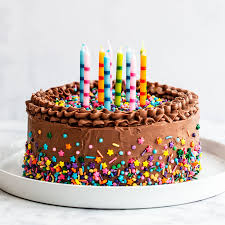
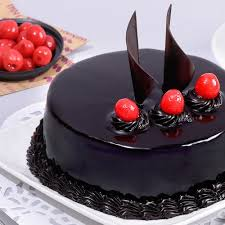
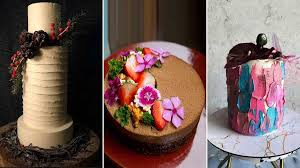
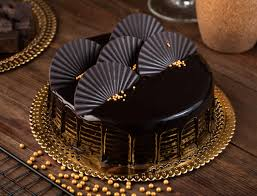
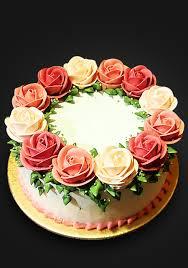
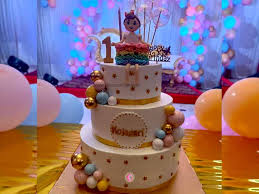
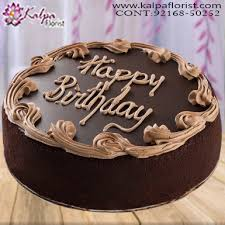
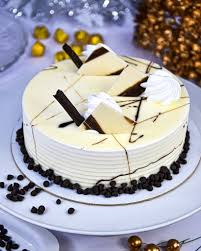
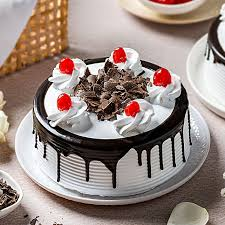
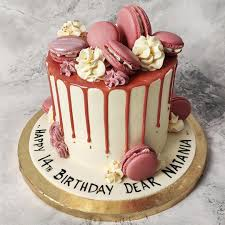

In [48]:
for x in range(len(img_urls)):
    if x >= 10:
        break
    print('Downloading {0} of {1} images'.format(x, 10))
    try:
        response = requests.get(img_urls[x])
    except requests.exceptions.RequestException as e:
        print(f'Failed to download image {x + 1}: {e}')
        continue
    
    file_path = r'C:\Users\akash\Downloads\image' + str(x) + '.jpg'
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print(f'Successfully downloaded image {x}')

# Question : 8
    
8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted
from any YouTube Video. 

In [49]:
driver.get('https://www.youtube.com/watch?v=zVVEjfMxXy8')

In [66]:
for _ in range(20):
    driver.execute_script('window.scrollBy(0,500)')

In [70]:
comments = []

for x in driver.find_elements(By.XPATH,'//span[@class="yt-core-attributed-string yt-core-attributed-string--white-space-pre-wrap"]')[1:101]:
    comments.append(x.text)

comments    

["Sydnie is so comfortable on stage it's hard not to like her immediately,, even before we heard her sing. THEN we get to hear a voice so pure, of such quality,, then Amanda did THAT,, WOW!",
 'Sydnie is such a kick, which  makes her fantastic. Love to see more of her.',
 'That is the best version of Tomorrow I have ever heard in my life, so comforting and warm I really just love it.\nSydnie Christmas, this is just the start.',
 'When Innocent Masuku finished the way speakers carried on his energy, as if he created  a Love magic and sent it out into the universe',
 "Yes, it was the best version of tomorrow that I ever heard.  She sang it with such feelings.  Her voice was amazing!  I bet she can sing 'Somewhere Over The Rainbow' with deep feelings too.  Her voice can carry it.",
 'OMG!!! I am not an opera person but Innocent Masuku was (is) so spectacular I had to watch him few times!!!',
 'I think sydnie has a voice for broadway its so beautiful and poweful and she has a great stage p

In [64]:
upvote = []

for x in driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-engagement-bar"]')[:500]:
    upvote.append(x.text.replace('\nReply',''))
    
upvote    

['268',
 '113',
 '260',
 '58',
 '48',
 '68',
 '212',
 '50',
 '41',
 '93',
 '60',
 '162',
 '28',
 '122',
 '32',
 '27',
 '51',
 '41',
 '21',
 '48',
 '47',
 '89',
 '39',
 '29',
 '25',
 '18',
 '42',
 '29',
 '32',
 '17',
 '18',
 '29',
 '11',
 '13',
 '11',
 '11',
 '13',
 '90',
 '2',
 '33',
 '33',
 '11',
 '32',
 '11',
 '14',
 '36',
 '8',
 '37',
 '33',
 '8',
 '22',
 '38',
 '24',
 '10',
 '27',
 '1',
 '17',
 '13',
 '12',
 '10',
 '2',
 '18',
 '6',
 '9',
 '10',
 '15',
 '6',
 '4',
 '2',
 '3',
 '5',
 '1',
 '4',
 '3',
 '7',
 '5',
 '5',
 '6',
 '14',
 '6',
 '6',
 '11',
 '5',
 '1',
 '4',
 '3',
 '4',
 '9',
 '3',
 '5',
 '2',
 '3',
 '10',
 '25',
 '13',
 '8',
 '3',
 '12',
 '5',
 '1']

In [68]:
times = []

try:
    for x in driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-comment-view-model"]/span[3]/a')[:100]:
        times.append(x.text.replace('@',''))
except NoSuchElementException as e:
    print('Exception raised',e)
    
times    

['4 weeks ago (edited)',
 '1 month ago',
 '1 month ago',
 '3 weeks ago',
 '4 weeks ago',
 '1 month ago',
 '3 weeks ago',
 '2 weeks ago',
 '4 weeks ago',
 '1 month ago',
 '1 month ago',
 '1 month ago',
 '3 weeks ago (edited)',
 '3 weeks ago',
 '4 weeks ago',
 '3 weeks ago',
 '4 weeks ago',
 '4 weeks ago',
 '3 weeks ago',
 '1 month ago',
 '1 month ago',
 '1 month ago',
 '4 weeks ago',
 '3 weeks ago',
 '1 month ago',
 '3 weeks ago',
 '1 month ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '13 days ago',
 '1 month ago',
 '13 days ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '3 weeks ago',
 '1 month ago',
 '6 days ago',
 '1 month ago',
 '3 weeks ago',
 '3 weeks ago',
 '1 month ago (edited)',
 '3 weeks ago',
 '3 weeks ago',
 '4 weeks ago',
 '3 weeks ago',
 '1 month ago',
 '3 weeks ago',
 '2 weeks ago',
 '1 month ago',
 '3 weeks ago (edited)',
 '1 month ago',
 '4 weeks ago',
 '4 weeks ago',
 '8 days ago (edited)',
 '2 weeks ago',
 '13 days ago (edited)',
 '3 weeks ago',
 '4 

In [71]:
len(comments),len(upvote),len(times)

(100, 100, 100)

In [72]:
youtube_df = pd.DataFrame({
    'Comments':comments,
    'Likes':upvote,
    'Time':times
})

In [73]:
youtube_df

,Comments,Likes,Time
0,Sydnie is so comfortable on stage it's hard no...,268,4 weeks ago (edited)
1,"Sydnie is such a kick, which makes her fantas...",113,1 month ago
2,That is the best version of Tomorrow I have ev...,260,1 month ago
3,When Innocent Masuku finished the way speakers...,58,3 weeks ago
4,"Yes, it was the best version of tomorrow that ...",48,4 weeks ago
...,...,...,...
95,I CHUMMED with Marine Foresters child \nShe wa...,8,1 month ago
96,Masaku is amazing,3,3 weeks ago
97,I love your show keep it up,12,1 month ago
98,the impressionist is the most talented guy out...,5,3 weeks ago (edited)


# Question : 5
    
5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.    

In [44]:
driver.get("https://maps.google.com")

In [45]:
try:
    city = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[1]/form/input')
    city.send_keys('Bangalore,India')
except NoSuchElementException as e :
    print('Error occurred', e)

In [47]:
search = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[1]/div[1]/button/span')
search.click()

In [48]:
import re

In [51]:
try:
    url_string = driver.current_url
    print('URL_Extracted: ', url_string)
    match = re.search(r'@(-?\d+\.\d+),(-?\d+\.\d+)', url_string)
    if match:
        latitude = float(match.group(1))
        longitude = float(match.group(2))
        print(f"Latitude: {latitude}, Longitude: {longitude}")
    else:
        print("Coordinates not found")
    
except:
    print('Error')

URL_Extracted:  https://www.google.com/maps/place/Bengaluru,+Karnataka/@12.9537902,77.3012683,10z/data=!3m1!4b1!4m6!3m5!1s0x3bae1670c9b44e6d:0xf8dfc3e8517e4fe0!8m2!3d12.9715987!4d77.5945627!16zL20vMDljMTc?entry=ttu
Latitude: 12.9537902, Longitude: 77.3012683
